In [1]:
import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
print(df_test.columns)


Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS'],
      dtype='object')


In [6]:
print(df_test['Height']) 

0        1.848294
1        1.600000
2        1.643355
3        1.553127
4        1.627396
           ...   
13835    1.721384
13836    1.590000
13837    1.585547
13838    1.620000
13839    1.812259
Name: Height, Length: 13840, dtype: float64


# **EDA**

In [7]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='Age',data=df_train)
plt.title('Relationship between Age and Obesity Levels')
plt.xlabel('Obesity level')
plt.ylabel('Age')
plt.show()Age: min=14, max=61

FCVC (Frequency of consumption of vegetables)

FAVC (frequently consume high-caloric food)

NCP (Number of main meals per day)

SCC: Stands for "Calories consumption monitoring," indicating whether the individual monitors their calorie consumption (yes/no)

CH2O (Consumption of water daily)

FAF (Physical activity frequency)

TUE (Time using technology devices)

CALC: Stands for "Consumption of alcohol," representing the frequency of alcohol consumption.

CAEC: Stands for "Consumption of food between meals," representing the frequency of consuming food between meals.

MTRANS: Stands for "Mode of transportation,"




In [8]:
classes_count = df_train['NObeyesdad'].value_counts()
classes_count

NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

In [9]:
len(classes_count)

7

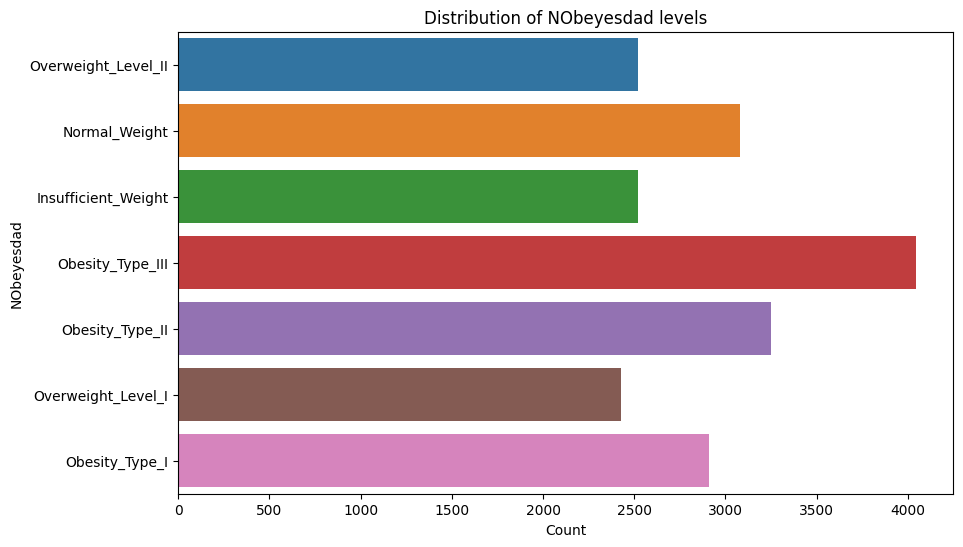

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=df_train)
plt.xlabel('Count')
plt.ylabel('NObeyesdad')
plt.title('Distribution of NObeyesdad levels')
plt.show()

In [11]:
print('training data shape: ', df_train.shape)
print('training data shape: ', df_test.shape)

training data shape:  (20758, 18)
training data shape:  (13840, 17)


In [12]:
df_train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

<Figure size 1500x800 with 0 Axes>

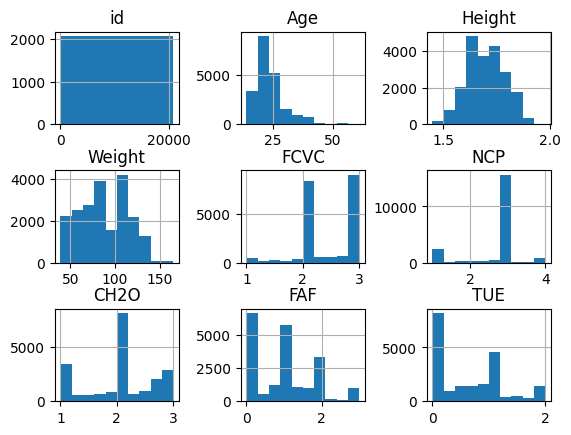

In [13]:
plt.figure(figsize=(15, 8))  # Définit la taille de la figure
df_train.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

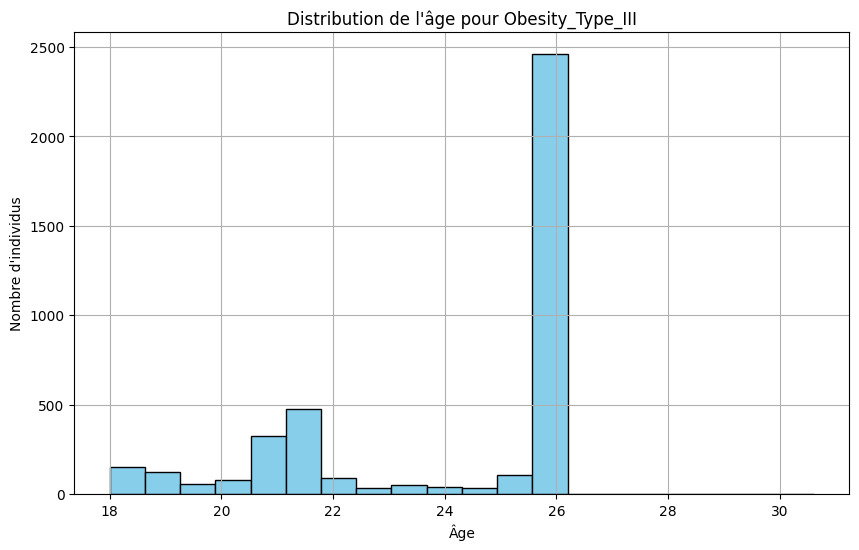

In [14]:


# Filtrer les données pour ne conserver que les lignes avec 'NObeyesdad' égal à 'Obesity_Type_III'
obesity_type_III_data = df_train[df_train['NObeyesdad'] == 'Obesity_Type_III']

# Plot
plt.figure(figsize=(10, 6))
obesity_type_III_data['Age'].hist(bins=20, color='skyblue', edgecolor='black')

# Titres et labels
plt.title('Distribution de l\'âge pour Obesity_Type_III')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'individus')

# Afficher le plot
plt.show()



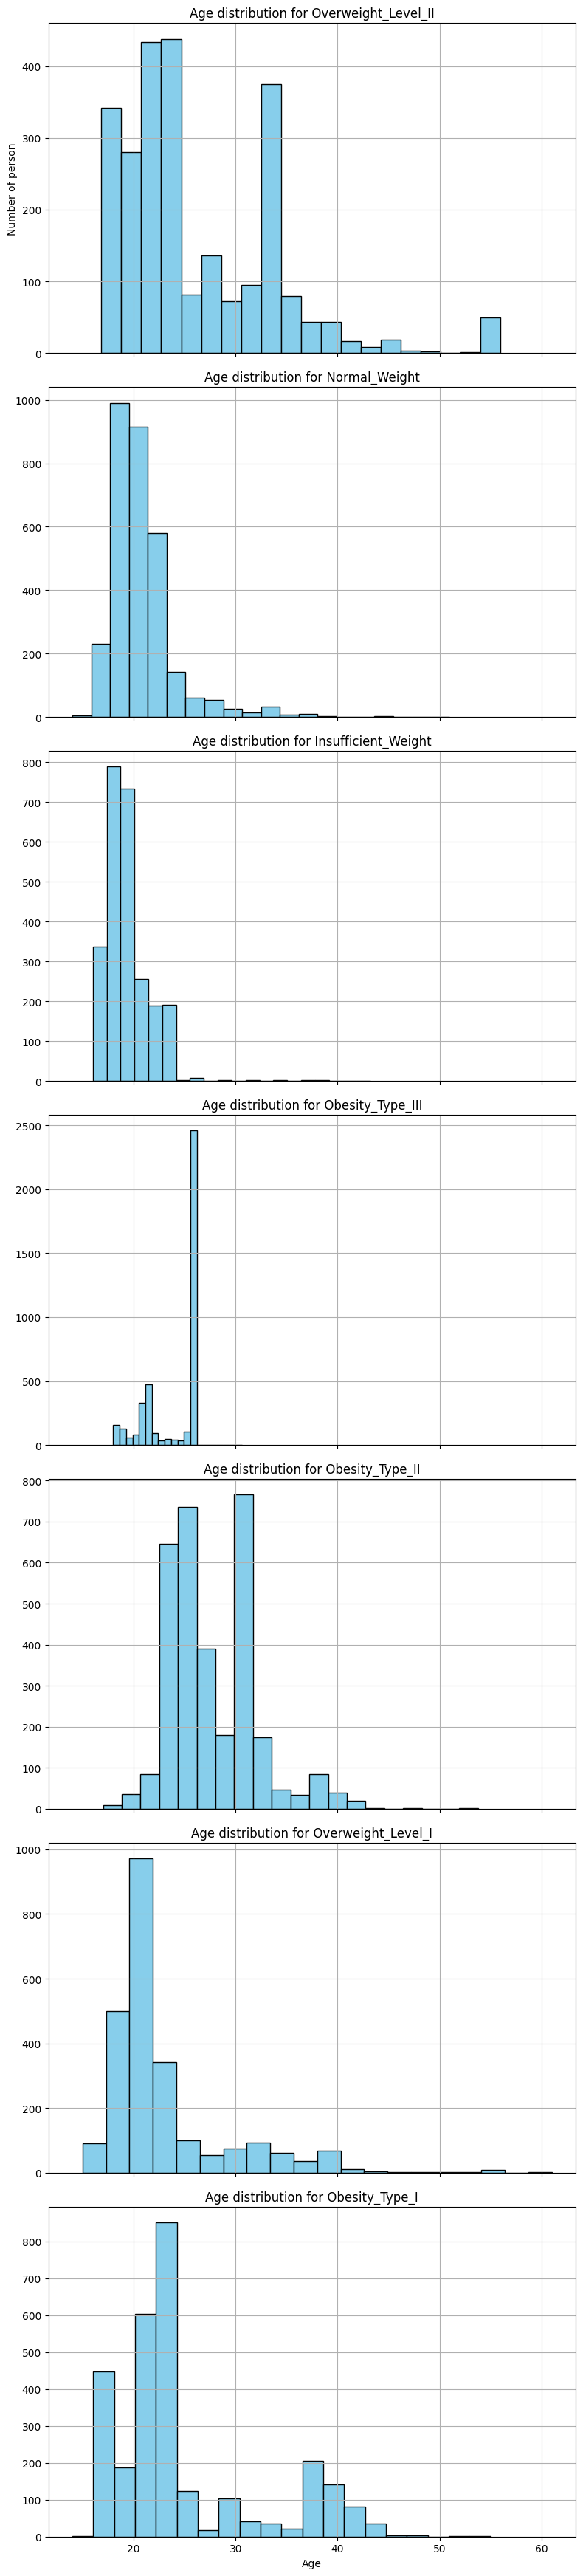

In [15]:

# Séparer les données en fonction de chaque classe d'obésité
obesity_classes = df_train['NObeyesdad'].unique()

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(nrows=len(obesity_classes), ncols=1, figsize=(8, 5*len(obesity_classes)), sharex=True)

# Plot pour chaque classe d'obésité
for i, obesity_class in enumerate(obesity_classes):
    # Filtrer les données pour la classe d'obésité actuelle
    data = df_train[df_train['NObeyesdad'] == obesity_class]
    
    # Tracer l'histogramme pour cette classe d'obésité
    data['Age'].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    
    # Ajouter le titre pour cette classe d'obésité
    axes[i].set_title('Age distribution for ' + obesity_class)
    
    # Ajouter le label pour l'axe y uniquement au premier subplot
    if i == 0:
        axes[i].set_ylabel('Number of person')

# Ajouter le label pour l'axe x au dernier subplot
axes[-1].set_xlabel('Age')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le plot
plt.show()


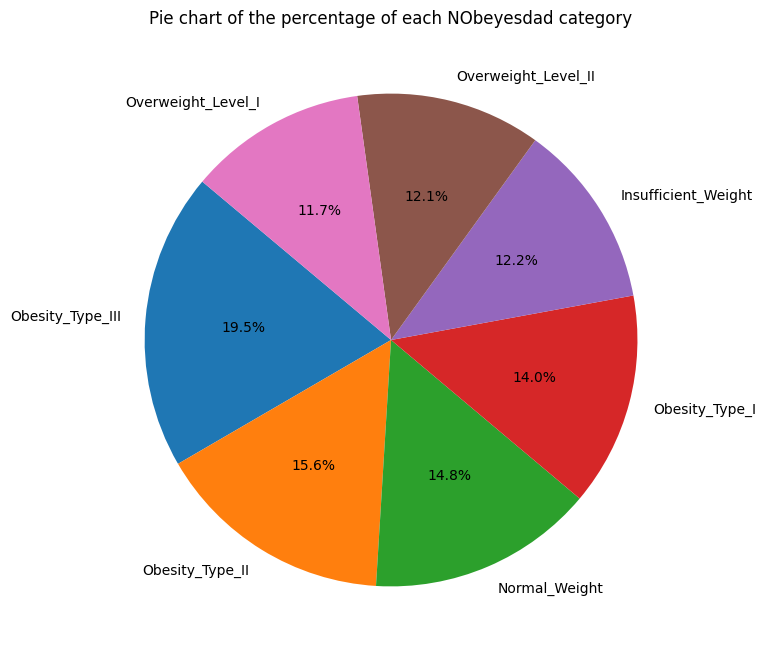

In [16]:

counts = df_train['NObeyesdad'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Pie chart of the percentage of each NObeyesdad category')

plt.show()


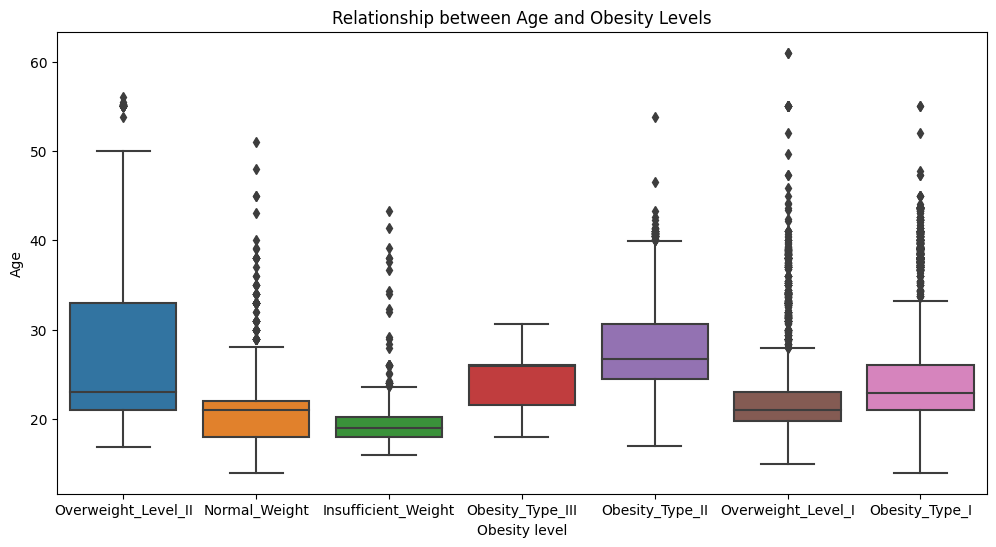

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y='Age',data=df_train)
plt.title('Relationship between Age and Obesity Levels')
plt.xlabel('Obesity level')
plt.ylabel('Age')
plt.show()

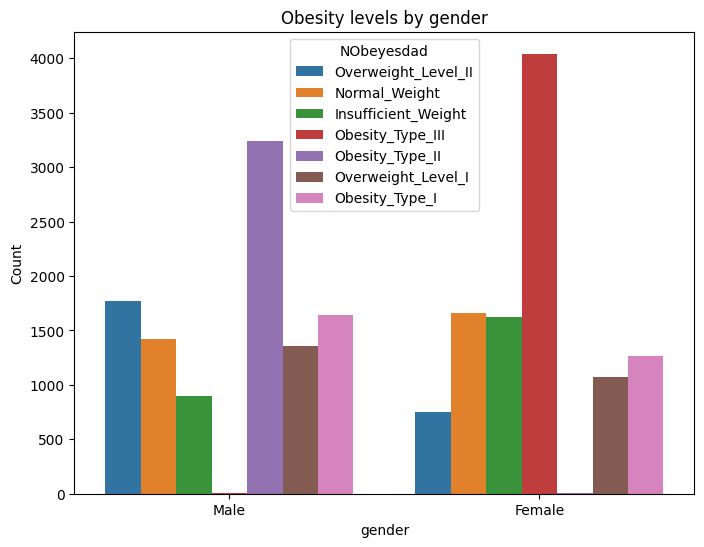

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='NObeyesdad', data=df_train)
#add_data_labels(ax)
plt.title('Obesity levels by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

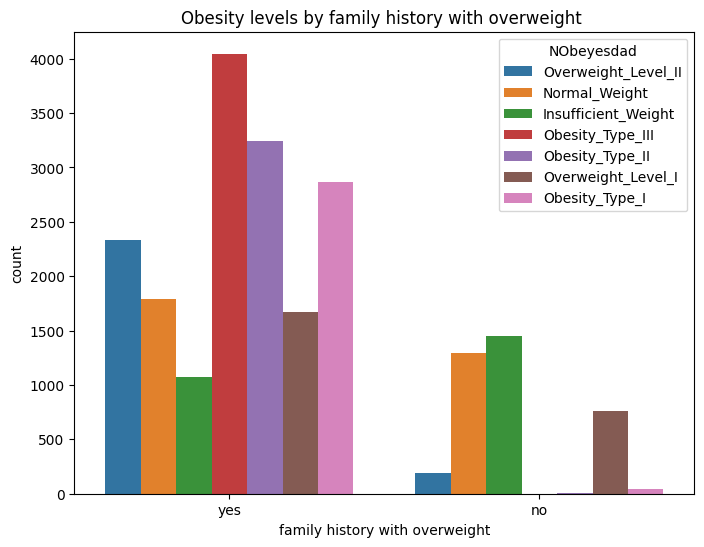

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df_train)
plt.title('Obesity levels by family history with overweight ')
plt.xlabel('family history with overweight')
plt.ylabel('count')
plt.show()

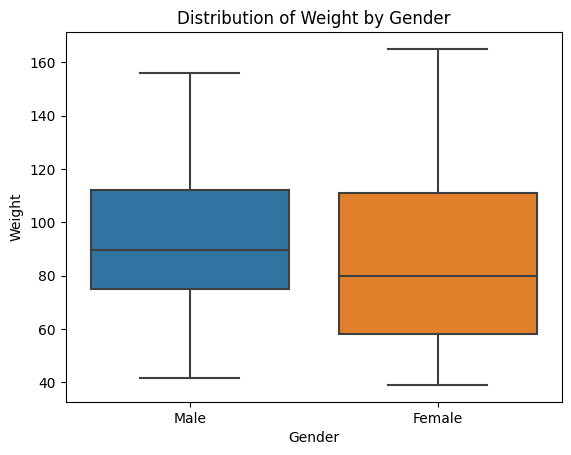

In [20]:
sns.boxplot(x='Gender', y='Weight', data=df_train)
plt.title('Distribution of Weight by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.show()

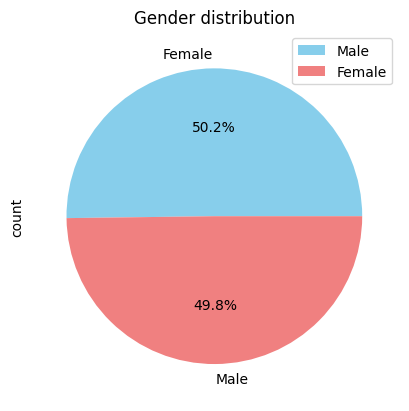

In [21]:
df_train['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender distribution')
#plt.legend(labels=['Female','Male'], low='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.legend(labels=df_train['Gender'].unique(), loc='upper right')
plt.show()

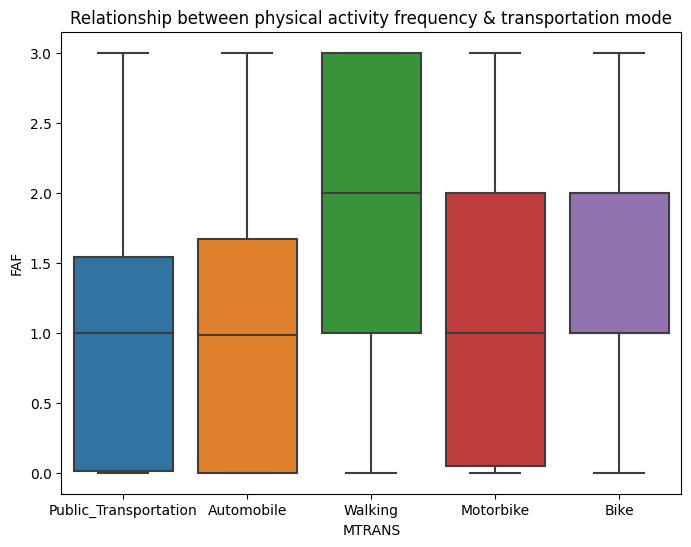

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(x='MTRANS', y='FAF', data=df_train)
#sns.violinplot(x='MTRANS', y='FAF', data=df_train)
plt.title('Relationship between physical activity frequency & transportation mode')
plt.xlabel('MTRANS')
plt.ylabel('FAF')
plt.show()

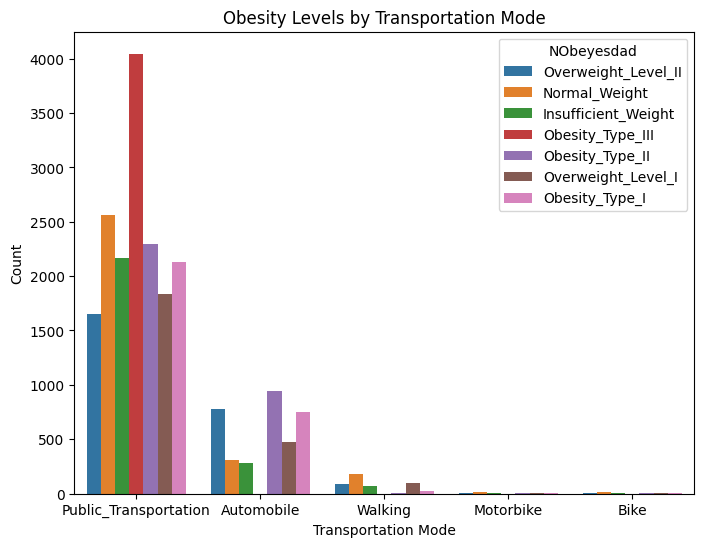

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=df_train)
plt.title('Obesity Levels by Transportation Mode')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.show()

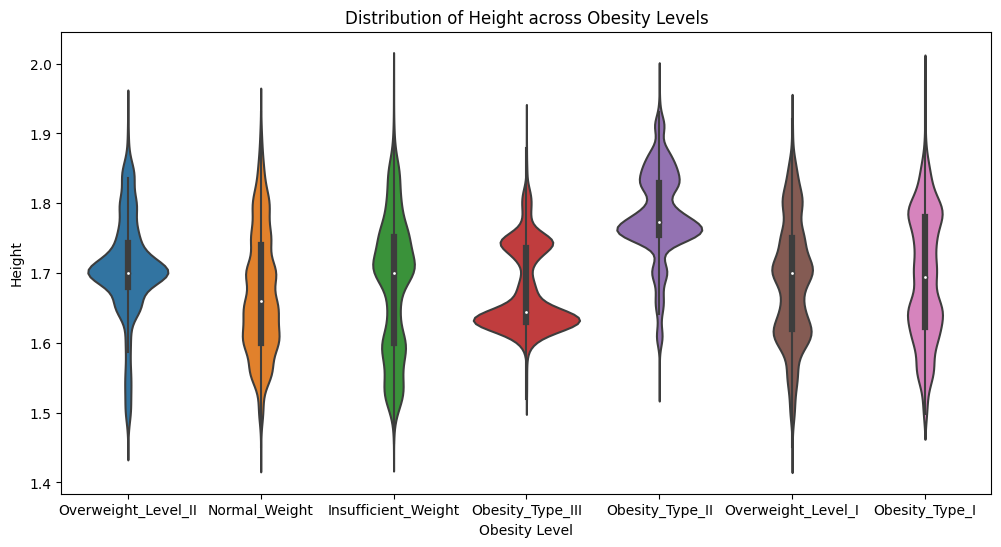

In [24]:
plt.figure(figsize=(12,6))
sns.violinplot(x='NObeyesdad', y='Height', data=df_train)
plt.title('Distribution of Height across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Height')
plt.show()

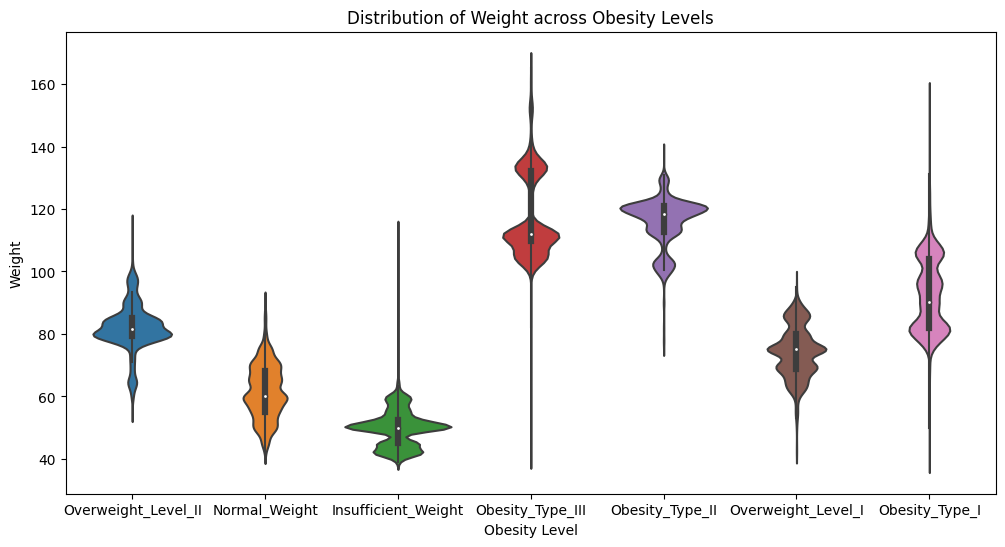

In [25]:
plt.figure(figsize=(12,6))
sns.violinplot(x='NObeyesdad', y='Weight', data=df_train)
plt.title('Distribution of Weight across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Weight')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

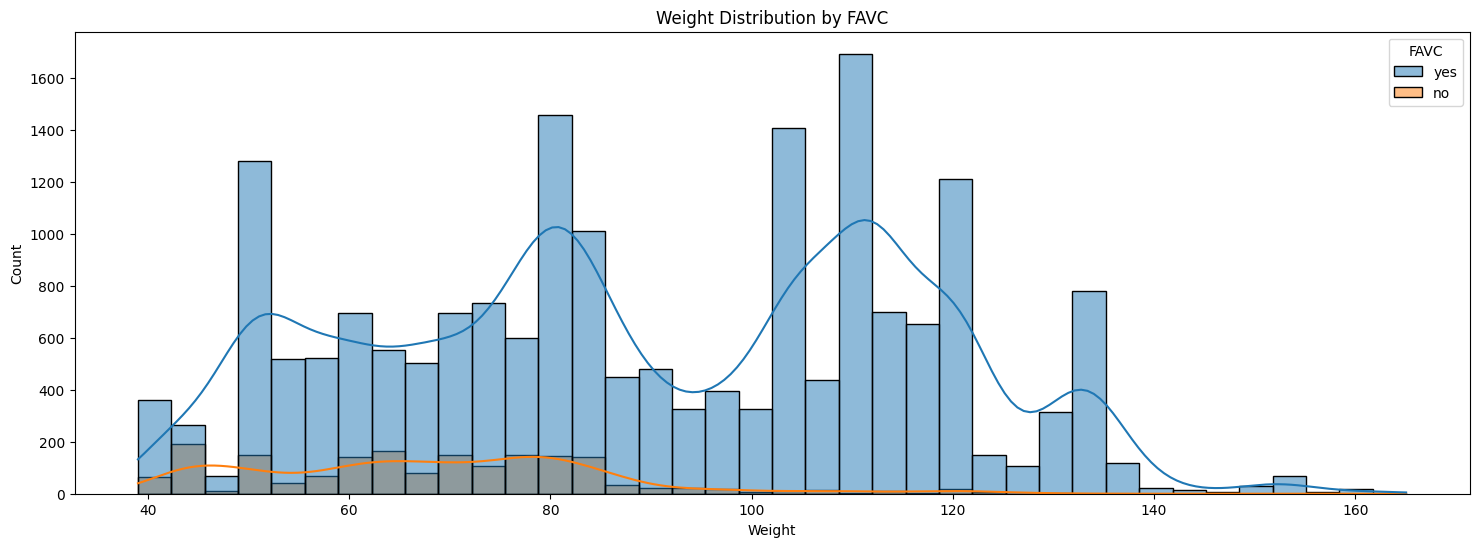

In [26]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df_train, x='Weight', hue='FAVC', kde=True)
plt.title('Weight Distribution by FAVC')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


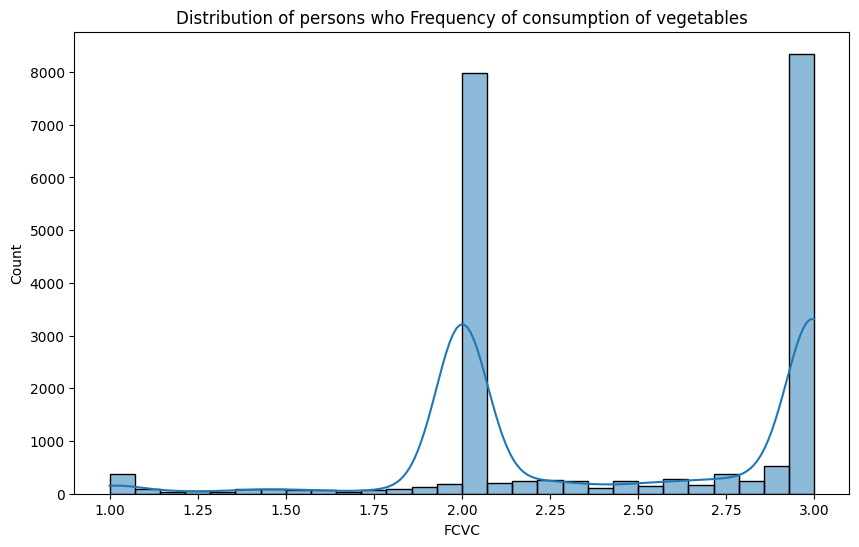

In [27]:

plt.figure(figsize=(10, 6))
sns.histplot(df_train['FCVC'], kde=True)
# Titres et labels
plt.title('Distribution of persons who Frequency of consumption of vegetables')
plt.xlabel('FCVC')
plt.ylabel('Count')

# Afficher le plot
plt.show()

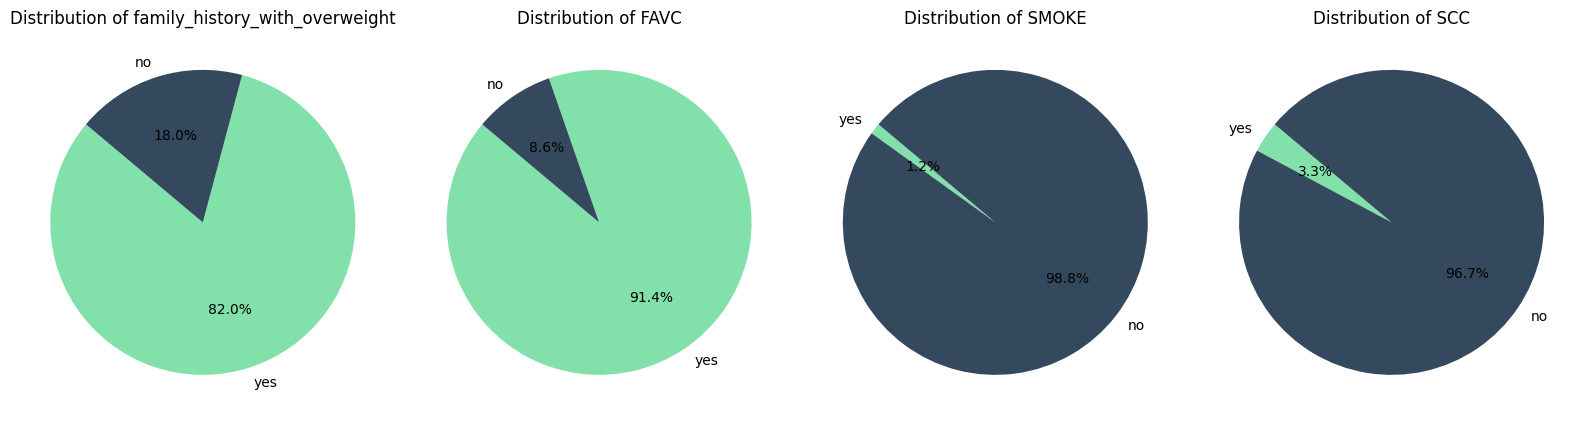

In [28]:

columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for i, column in enumerate(columns):
    counts = df_train[column].value_counts()
    
    # Réorganisation des valeurs pour garantir que "yes" soit toujours en premier
    counts = counts.reindex(['yes', 'no'])
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#82E0AA', '#34495E'])
    
    axes[i].set_title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()


CALC: Stands for "Consumption of alcohol," representing the frequency of alcohol consumption.

CAEC: Stands for "Consumption of food between meals," representing the frequency of consuming food between meals.

MTRANS: Stands for "Mode of transportation,"

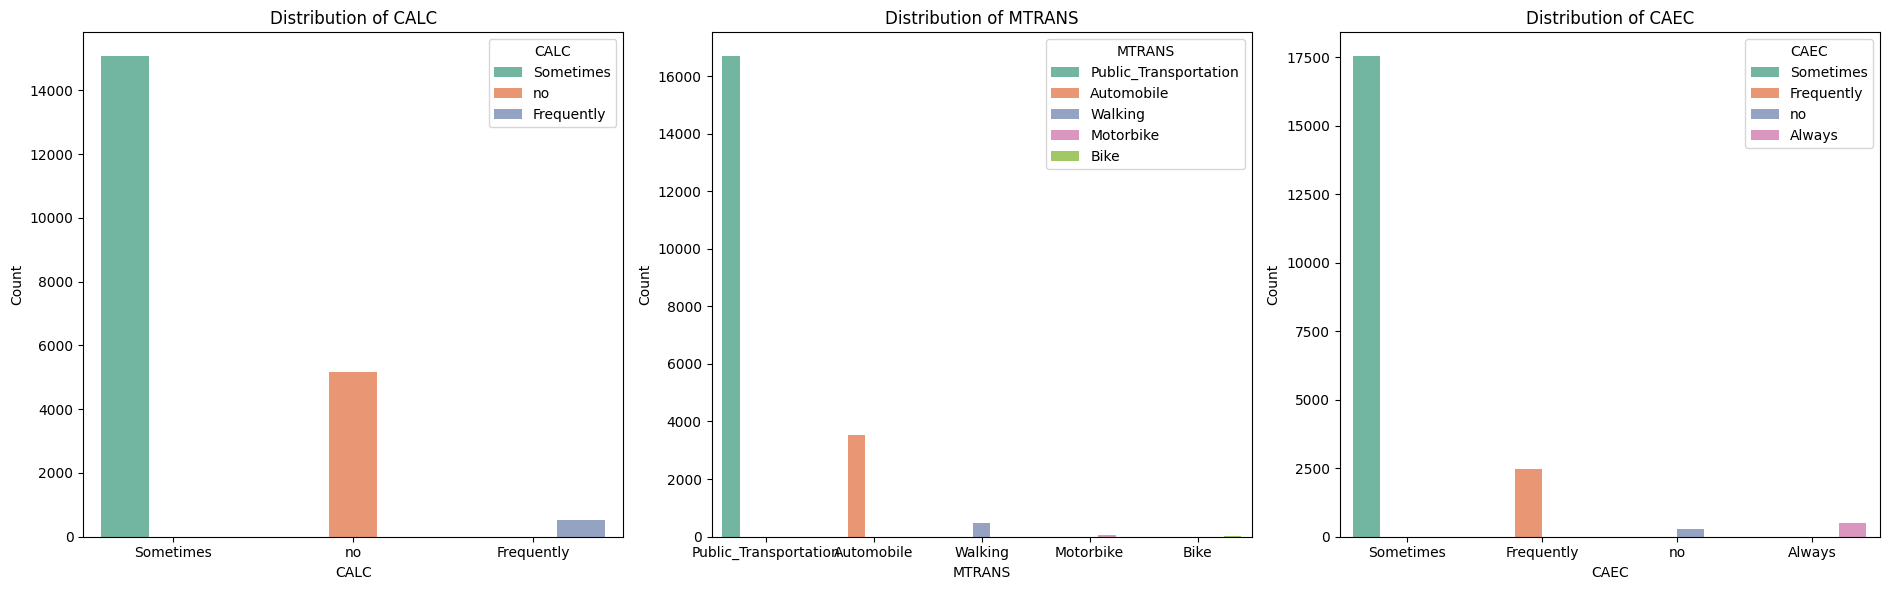

In [29]:
columns=['CALC','MTRANS','CAEC']
fig,axes=plt.subplots(1,3,figsize=(19,6))

for i, column in enumerate(columns):
    sns.countplot(x=column, data=df_train, hue=column, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

*     1 indique une corrélation positive parfaite : lorsque la valeur d'une variable augmente, la valeur de l'autre variable augmente également de manière linéaire.
*     -1 indique une corrélation négative parfaite : lorsque la valeur d'une variable augmente, la valeur de l'autre variable diminue de manière linéaire.
*     0 indique une absence de corrélation linéaire entre les variables.

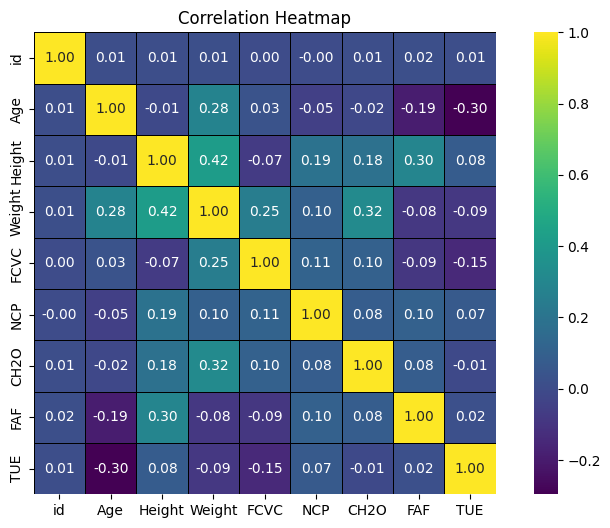

In [30]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, linecolor='black', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

# **Data Preprocessing**

In [31]:
obeyesdad = df_train['NObeyesdad']

**Binary encoding for categorical features**

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder



categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_train[col] = label_encoders[col].fit_transform(df_train[col])
df_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_train.drop(columns=['NObeyesdad'])
y = df_train['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16606, 17)
(16606,)
(4152, 17)
(4152,)


# **Building model**

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

**Random Forest Model**

In [36]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of random forest model: ',accuracy)
print('Classification report:\n', classification_report(y_test,y_pred))
      

accuracy of random forest model:  0.8966763005780347
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.84      0.88      0.86       626
           2       0.89      0.86      0.88       543
           3       0.98      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.78      0.75      0.76       484
           6       0.78      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.88      0.89      4152
weighted avg       0.90      0.90      0.90      4152



**Gradient Boost Model**

In [37]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9029383429672447
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       524
           1       0.88      0.89      0.88       626
           2       0.88      0.88      0.88       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.77      0.77       484
           6       0.79      0.80      0.80       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



**XGBoost Classifier**

In [38]:
xgboost = xgb.XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8986030828516378
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.87      0.88      0.88       626
           2       0.88      0.86      0.87       543
           3       0.97      0.97      0.97       657
           4       0.99      1.00      1.00       804
           5       0.76      0.78      0.77       484
           6       0.78      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



**Support Vector Classifier**

**Neural Network: MLPClassifier**

In [39]:
neural_network = MLPClassifier(random_state=42)
neural_network.fit(X_train, y_train)
y_pred_nn = neural_network.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

Neural Network Accuracy: 0.3646435452793834
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.91      0.56       524
           1       0.33      0.37      0.35       626
           2       0.49      0.10      0.17       543
           3       0.33      0.97      0.49       657
           4       0.98      0.07      0.13       804
           5       0.37      0.11      0.17       484
           6       0.28      0.01      0.02       514

    accuracy                           0.36      4152
   macro avg       0.45      0.36      0.27      4152
weighted avg       0.48      0.36      0.27      4152



**Logistic Regression**

In [40]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8966763005780347
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.42      0.47       524
           1       0.37      0.54      0.44       626
           2       0.23      0.17      0.19       543
           3       0.32      0.54      0.41       657
           4       0.43      0.48      0.45       804
           5       0.00      0.00      0.00       484
           6       0.26      0.22      0.23       514

    accuracy                           0.36      4152
   macro avg       0.31      0.34      0.31      4152
weighted avg       0.32      0.36      0.33      4152



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

**K-Nearest Neighbors**

In [41]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.44388246628131023
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       524
           1       0.41      0.48      0.44       626
           2       0.34      0.36      0.35       543
           3       0.47      0.52      0.49       657
           4       0.52      0.50      0.51       804
           5       0.33      0.29      0.31       484
           6       0.38      0.24      0.29       514

    accuracy                           0.44      4152
   macro avg       0.43      0.43      0.43      4152
weighted avg       0.44      0.44      0.44      4152



# **Create an ensemble learning**

In [42]:
from sklearn.ensemble import VotingClassifier

# Define the base classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('Random Forest', rf_classifier),
        ('Gradient Boosting', gb_classifier),
        ('XGBoost', xgb_classifier)
    ],
    voting='hard'
)

# Train the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Evaluate the Voting Classifier
accuracy = voting_classifier.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.9034200385356455


**Testing with Random Forest Model**


In [43]:
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.84      0.88      0.86       626
           2       0.89      0.86      0.88       543
           3       0.98      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.78      0.75      0.76       484
           6       0.78      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.88      0.89      4152
weighted avg       0.90      0.90      0.90      4152



# Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
## xlabel: Predicted labels
## ylabel: True labels

[[485  36   0   0   0   2   1]
 [ 26 554   0   0   0  37   9]
 [  1   2 469  11   1  16  43]
 [  0   0  14 639   2   0   2]
 [  0   0   0   1 802   1   0]
 [  1  49   9   0   0 362  63]
 [  0  15  36   4   0  47 412]]


In [45]:
original=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
original

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [46]:
df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,1,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,2,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,2,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,1,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,2,0,2.151809,0,1.330519,0.196680,1,3,3
20754,20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,1,0,1.000000,0,2.000000,1.000000,1,3,0
20755,20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,2,0,2.000000,0,1.158040,1.198439,2,3,3
20756,20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,2,0,2.144838,0,0.000000,0.973834,2,0,6


In [47]:
mapping_df = pd.DataFrame({'Original_Value': original['NObeyesdad'], 'Encoriginalalue': df_train['NObeyesdad']})
mapping_df.head()




,Original_Value,Encoriginalalue
0,Overweight_Level_II,6
1,Normal_Weight,1
2,Insufficient_Weight,0
3,Obesity_Type_III,4
4,Overweight_Level_II,6


# **Display Results**

In [48]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.head(10)

,Actual,Predicted
10317,4,4
4074,5,5
9060,2,2
11286,3,3
8254,0,0
13071,0,0
11417,4,4
6315,3,3
14351,4,4
18914,5,6


In [49]:
# Convert y_pred and y_test to pandas Series because they are numpy arrays
y_pred_series = pd.Series(y_pred, index=y_test.index)
output = pd.DataFrame({'Actual': y_test, 'Predicted_NObeyesdad': y_pred_series})
output.head(10)

,Actual,Predicted_NObeyesdad
10317,4,4
4074,5,5
9060,2,2
11286,3,3
8254,0,0
13071,0,0
11417,4,4
6315,3,3
14351,4,4
18914,5,6


In [50]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
df_test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [51]:
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df_test[col] = label_encoders[col].fit_transform(df_test[col])
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3


In [52]:
y_pred_test = model.predict(df_test)

# Add predictions to the test data DataFrame
df_test['Predicted_NObeyesdad'] = y_pred_test

# Display the test data with predictions
df_test.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Predicted_NObeyesdad
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3,5
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3,4
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3,2
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3,4
5,20763,1,19.799054,1.844751,59.605028,1,1,2.000000,4.000000,2,0,2.722063,0,2.000000,1.283673,3,0,0
6,20764,1,18.000000,1.728834,51.442293,1,1,1.202075,3.000000,2,0,1.087166,0,0.788585,1.000000,2,3,0
7,20765,1,20.000000,1.810000,80.000000,1,1,2.000000,3.000000,0,0,2.000000,0,3.000000,0.000000,3,0,5
8,20766,1,21.000000,1.700000,80.000000,1,1,2.000000,3.000000,1,1,2.000000,0,0.000000,2.000000,3,3,6
9,20767,0,21.000000,1.560000,53.000000,0,1,2.000000,3.000000,2,0,2.000000,0,0.000000,1.000000,2,3,1


In [53]:
submission_df = pd.DataFrame({
    'id': df_test.id,
    'NObeyesdad': df_test['Predicted_NObeyesdad']
})
submission_df

,id,NObeyesdad
0,20758,3
1,20759,5
2,20760,4
3,20761,2
4,20762,4
...,...,...
13835,34593,6
13836,34594,1
13837,34595,0
13838,34596,1


In [54]:
submission_df = pd.DataFrame({
    'id': df_test.id,
    'NObeyesdad': df_test['Predicted_NObeyesdad']
})

# Define a reverse mapping dictionary for NObeyesdad categories
reverse_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Obesity_Type_I',
    3: 'Obesity_Type_II',
    4: 'Obesity_Type_III',
    5: 'Overweight_Level_I',
    6: 'Overweight_Level_II'
}

# Map the encoded predictions back to their original categorical values
submission_df['NObeyesdad'] = submission_df['NObeyesdad'].map(reverse_mapping)

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the submission dataFrame
submission_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
